In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('ipl.csv')

In [3]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
## Data Cleaning
# Removing Unwanted Column
columns_to_remove = ['mid' , 'batsman','bowler','striker','non-striker','venue']
data.drop(labels=columns_to_remove,axis = 1 , inplace = True)

In [5]:
data.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians','Kings XI Punjab',
                   'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [7]:
data = data[(data['bat_team'].isin(consistent_team)) & (data['bowl_team'].isin(consistent_team))]

In [8]:
data = data[data['overs']>=5.0]

In [9]:
#converting the column "date" from string into datetime object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [10]:
# data Preprocessing
# converting categorical feature using OneHotEncoding
encoded_data = pd.get_dummies(data = data , columns = ['bat_team','bowl_team'])

In [11]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [13]:
encoded_data.shape

(40108, 23)

In [14]:
encoded_data = encoded_data[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [17]:
x_train = encoded_data.drop(labels = 'total' , axis = 1)[encoded_data['date'].dt.year <= 2016]
x_test = encoded_data.drop(labels = 'total' , axis = 1)[encoded_data['date'].dt.year >= 2017]

In [18]:
y_train = encoded_data[encoded_data['date'].dt.year <= 2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2017]['total'].values

In [19]:
x_train.drop(labels='date', axis = 1 , inplace = True)
x_test.drop(labels='date' , axis = 1, inplace= True)

In [22]:
## ---- Model Building----
## -------Ridge Regression----------
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [24]:
ridge = Ridge()
parameters = {'alpha':[1e-5,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,30,40,50]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv = 5)
ridge_regressor.fit(x_train,y_train)

C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46135e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.50393e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.43432e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.57342e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-328.3461582969202


In [26]:
prediction = ridge_regressor.predict(x_test)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

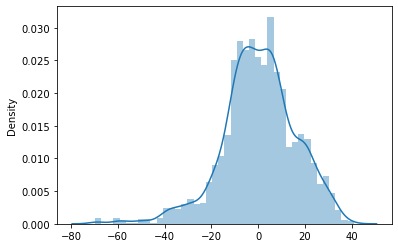

In [28]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE : ",mean_absolute_error(y_test,prediction))
print("MSE : ",mean_squared_error(y_test,prediction))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,prediction)))

MAE :  12.116975720986474
MSE :  251.03781533560868
RMSE :  15.844172914217033


In [29]:
## ---- Model Building----
## -------Ridge Regression----------
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [32]:
lasso = Lasso()
parameters = {'alpha':[1e-5,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,30,40,50]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv = 5)
lasso_regressor.fit(x_train,y_train)

C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.892e+05, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.828e+05, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.536e+05, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [33]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.8221491835716


In [34]:
prediction = lasso_regressor.predict(x_test)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

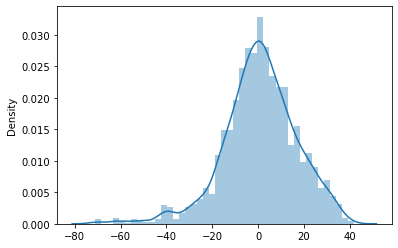

In [35]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE : ",mean_absolute_error(y_test,prediction))
print("MSE : ",mean_squared_error(y_test,prediction))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,prediction)))

MAE :  12.213583996827493
MSE :  262.3653827960697
RMSE :  16.197696836157593
